In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", 100)
# Create Dataframe
df = pd.read_csv('marketing_campaign.csv', sep='\t')
# Print shape of dataset
print(df.shape)

(2240, 29)


In [2]:
#check the null values
null_feature=[features for features in df.columns if df[features].isnull().sum()>=1]

In [3]:
null_feature

['Income']

In [4]:
for feature in null_feature:
    print(feature,np.round(df[feature].isnull().mean()*100,10),'% missing values')

Income 1.0714285714 % missing values


In [5]:
df[null_feature].select_dtypes(exclude='object').describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [6]:
#filling the null values by the median due to present of the outliar
df.Income.fillna(df['Income'].median(),inplace=True)

In [7]:
df['Income'].isnull().sum()

np.int64(0)

In [8]:
#handling the duplicate 
df.duplicated().sum()

np.int64(0)

In [9]:
#In previoun file EDA we see that the colum Z_Contact and Z_Revenue has no varinace , so we drop these column  and also id colum doses not play any role

drop_column = ['ID', 'Z_CostContact','Z_Revenue']
for col in drop_column:
    df.drop(col,inplace=True,axis=1)

In [10]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [11]:
# feature extrartion 
# same as we do previous
df['Marital_Status'].replace({
    "Together":1,
    "Married":1,
    "Single":0,
    "Divorced":0,
    "Widow":0,
    "Alone":0,
    "Absurd":0,
    "YOLO":0,

    
},inplace=True)
df['Marital_Status'].unique()

array([0, 1])

In [12]:
df['Education'].replace({
    "Basic":0,
    "2n Cycle":1,
    "Graduation":2,
    "Master":3,
    "PhD":4,
},inplace=True)

In [13]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,2,0,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,2,0,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,2,1,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,2,1,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,4,1,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,1,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,1946,4,1,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,1981,2,0,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,1956,3,1,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [14]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Age']=2025-df['Year_Birth']
df['Children']=df['Kidhome']+df['Teenhome']
# df['Family_Size']=df['Marital_Status']+df['Children']+1  #we plus one because for double or married we make value 1
df['total_spend']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df["total_promo"] =  df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

In [15]:
# As like as in EDA file we remove the unnaccesory drop_column
# Here we again remove the unceccesary column
df.drop(columns={'Year_Birth'},axis=1,inplace=True)
df.drop(columns={'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'} , axis=1,inplace=True)
df.drop(columns={'Kidhome','Teenhome'},axis=1,inplace=True)
df.drop(columns={'Response','Complain'},axis=1,inplace=True)

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [17]:
df.dtypes

Education                       int64
Marital_Status                  int64
Income                        float64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Age                             int64
Children                        int64
total_spend                     int64
total_promo                     int64
dtype: object

In [18]:
#we add a new column to check the parental status 
df['Parental_status']=np.where(df['Children']>0,1,0)

In [19]:
from datetime import datetime
today=datetime.today()
#create new column so that we can find how many day the customer is present
df['Days_as_Customer']=(today-df['Dt_Customer']).dt.days

In [20]:
df['Days_as_Customer']

0       4684
1       4134
2       4333
3       4160
4       4182
        ... 
2235    4402
2236    4040
2237    4176
2238    4177
2239    4643
Name: Days_as_Customer, Length: 2240, dtype: int64

In [21]:
#now we can remove the column Dt_Customer
df.drop(columns={'Dt_Customer'},axis=1,inplace=True)

In [22]:
df.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits",
                   "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog",
                   "NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"},
          inplace = True)

In [23]:
df.dtypes

Education               int64
Marital Status          int64
Income                float64
Recency                 int64
Wines                   int64
Fruits                  int64
Meat                    int64
Fish                    int64
Sweets                  int64
Gold                    int64
Discount Purchases      int64
Web                     int64
Catalog                 int64
Store                   int64
NumWebVisitsMonth       int64
Age                     int64
Children                int64
total_spend             int64
total_promo             int64
Parental_status         int64
Days_as_Customer        int64
dtype: object

In [24]:

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
len(num_features)

21

In [25]:
#there is no catgorical column present 
#now for  a column if the no. of unique feature present in it is less than 25 then it is discrete feature else it is continuous

discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
len(discrete_features)

10

In [26]:
continuous_feature=[feature for feature in num_features if feature not in discrete_features]
len(continuous_feature)

11

In [27]:
df

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount Purchases,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,2,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,68,0,1617,0,0,4684
1,2,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,71,2,27,0,1,4134
2,2,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,60,0,776,0,0,4333
3,2,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,41,1,53,0,1,4160
4,4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,44,1,422,0,1,4182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,58,1,1341,0,1,4402
2236,4,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,79,3,444,1,1,4040
2237,2,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,44,0,1241,1,0,4176
2238,3,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,69,1,843,0,1,4177


In [28]:
continuous_feature

['Income',
 'Recency',
 'Wines',
 'Fruits',
 'Meat',
 'Fish',
 'Sweets',
 'Gold',
 'Age',
 'total_spend',
 'Days_as_Customer']

In [29]:
df1=df.copy()

In [30]:
df1

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount Purchases,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,2,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,68,0,1617,0,0,4684
1,2,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,71,2,27,0,1,4134
2,2,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,60,0,776,0,0,4333
3,2,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,41,1,53,0,1,4160
4,4,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,44,1,422,0,1,4182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,58,1,1341,0,1,4402
2236,4,1,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,79,3,444,1,1,4040
2237,2,0,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,44,0,1241,1,0,4176
2238,3,1,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,69,1,843,0,1,4177


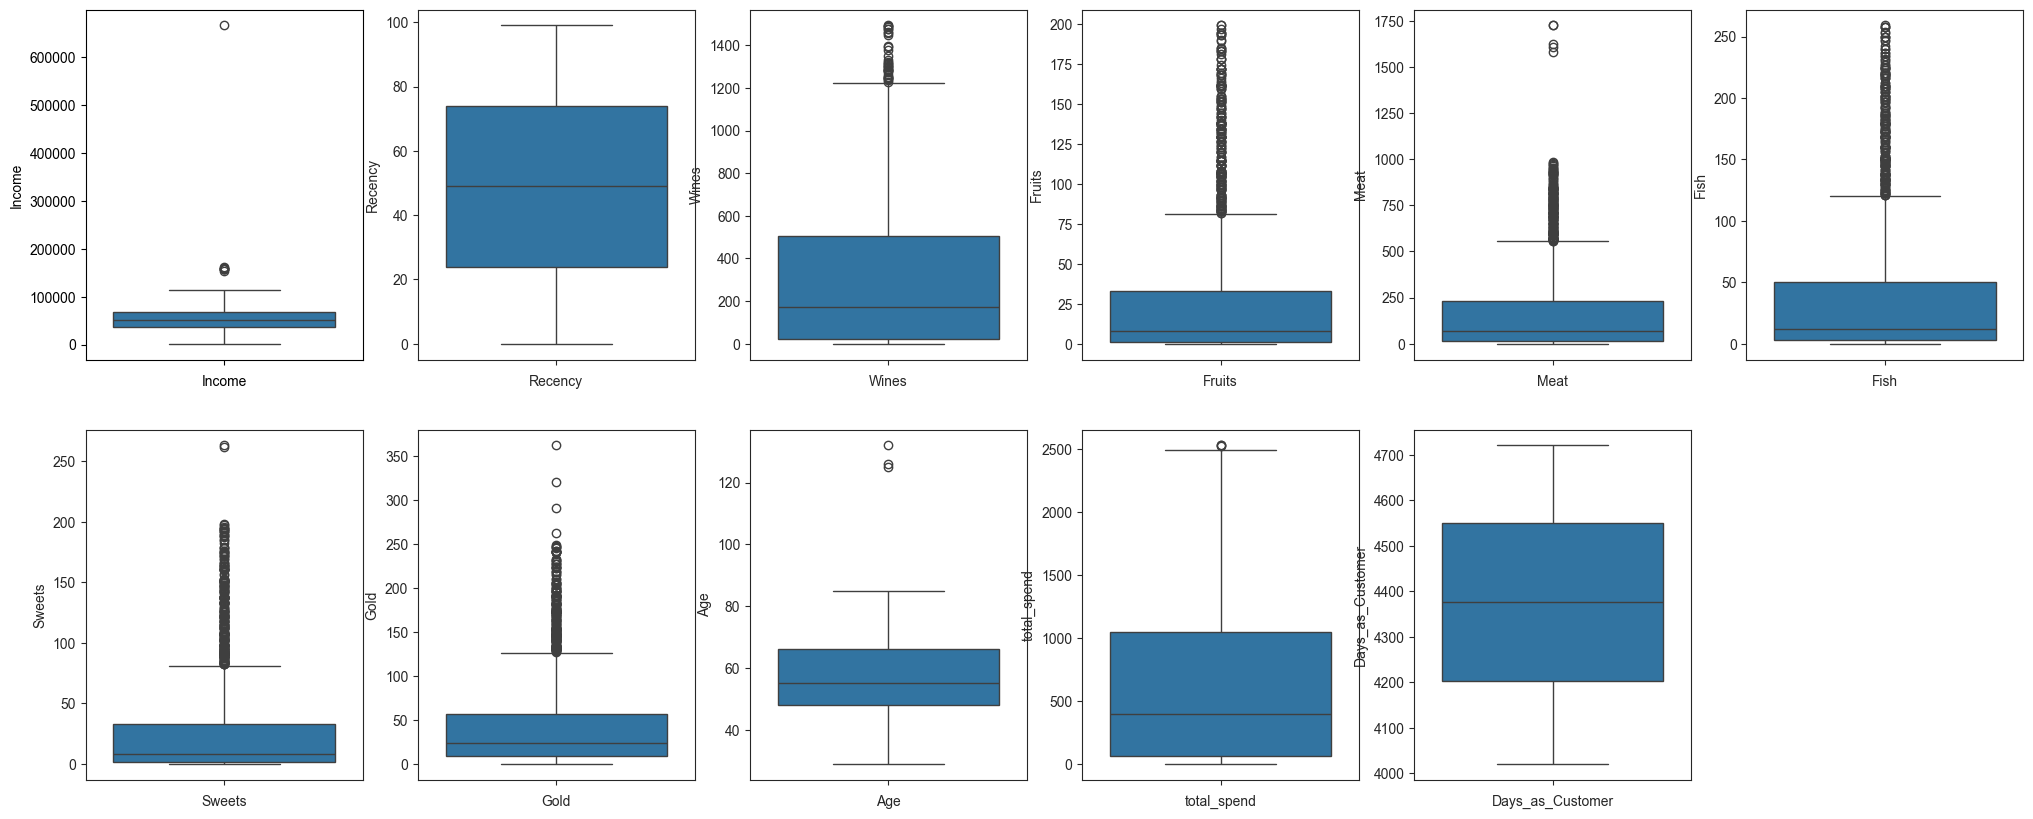

In [31]:
continous=continuous_feature.copy()

plt.figure(figsize=(25,10))

for i in range (len(continous)):
    plt.subplot(2,6,i+1)
    sns.set_style('ticks')
    plt.xlabel(continous[i])
    pl=sns.boxplot(df[continous[i]])

In [32]:
def DetectOutliar(col):
    # Finding the IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    print("percentile25",q1)
    print("percentile75",q3)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [33]:
for col in continuous_feature:
    DetectOutliar(col)

percentile25 35538.75
percentile75 68289.75
Upper limit 117416.25
Lower limit -13587.75
percentile25 24.0
percentile75 74.0
Upper limit 149.0
Lower limit -51.0
percentile25 23.75
percentile75 504.25
Upper limit 1225.0
Lower limit -697.0
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0
percentile25 16.0
percentile75 232.0
Upper limit 556.0
Lower limit -308.0
percentile25 3.0
percentile75 50.0
Upper limit 120.5
Lower limit -67.5
percentile25 1.0
percentile75 33.0
Upper limit 81.0
Lower limit -47.0
percentile25 9.0
percentile75 56.0
Upper limit 126.5
Lower limit -61.5
percentile25 48.0
percentile75 66.0
Upper limit 93.0
Lower limit 21.0
percentile25 68.75
percentile75 1045.5
Upper limit 2510.625
Lower limit -1396.375
percentile25 4201.75
percentile75 4550.0
Upper limit 5072.375
Lower limit 3679.375


In [34]:
df[continuous_feature].skew(axis=0,skipna=True)

Income              0.090027
Recency            -0.001987
Wines               1.096611
Fruits              1.233953
Meat                1.213585
Fish                1.230822
Sweets              1.213346
Gold                1.111307
Age                 0.120199
total_spend         0.860245
Days_as_Customer   -0.015216
dtype: float64

Feature Transformation-->
Scaling

In [35]:
numerical_feature=[ele for ele in df.columns if df[ele].dtype!='O']
outliar_feature=["Wines","Fruits","Meat","Fish","Sweets","Gold","Age","total_spend"] #we can find the columns which has oitliers form the boxplot diagram
numerical_feature=[ele for ele in num_features if ele not in outliar_feature]

In [36]:
numerical_feature

['Education',
 'Marital Status',
 'Income',
 'Recency',
 'Discount Purchases',
 'Web',
 'Catalog',
 'Store',
 'NumWebVisitsMonth',
 'Children',
 'total_promo',
 'Parental_status',
 'Days_as_Customer']

In [37]:
outliar_feature

['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'total_spend']

In [38]:
df

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount Purchases,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,2,0,58138.0,58,635,81,546,120.5,81,88.0,3,8,10,4,7,68,0,1617.0,0,0,4684.0
1,2,0,46344.0,38,11,1,6,2.0,1,6.0,2,1,1,2,5,71,2,27.0,0,1,4134.0
2,2,1,71613.0,26,426,49,127,111.0,21,42.0,1,8,2,10,4,60,0,776.0,0,0,4333.0
3,2,1,26646.0,26,11,4,20,10.0,3,5.0,2,2,0,4,6,41,1,53.0,0,1,4160.0
4,4,1,58293.0,94,173,43,118,46.0,27,15.0,5,5,3,6,5,44,1,422.0,0,1,4182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42.0,81,126.5,2,9,3,4,5,58,1,1341.0,0,1,4402.0
2236,4,1,64014.0,56,406,0,30,0.0,0,8.0,7,8,2,5,7,79,3,444.0,1,1,4040.0
2237,2,0,56981.0,91,908,48,217,32.0,12,24.0,1,2,3,13,6,44,0,1241.0,1,0,4176.0
2238,3,1,69245.0,8,428,30,214,80.0,30,61.0,2,6,5,10,3,69,1,843.0,0,1,4177.0


In [39]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [41]:
new_df=df.copy()
num_pipeline=Pipeline(steps=
                      [("Imputer",SimpleImputer(strategy='constant',fill_value=0)),
                       ("StandardScaler", StandardScaler())
                          
                      ])

outlier_features_pipeline = Pipeline(steps=
                                     [("Imputer", SimpleImputer(strategy='constant', fill_value=0)),
                                      ("transformer", PowerTransformer(standardize=True))]
                                    )
preprocessor = ColumnTransformer(
    [
        ("numeric pipeline",num_pipeline, numerical_feature),
        ("Outliers Features Pipeline", outlier_features_pipeline, outliar_feature)
    ]
)

columns=new_df.columns
new_df=preprocessor.fit_transform(new_df)
scaled_data=pd.DataFrame(new_df,columns=columns)



In [42]:
scaled_data.head()

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount Purchases,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,-0.458383,-1.346874,0.299651,0.307039,0.349414,1.409304,2.510890,-0.550785,0.693904,-1.264505,-0.439037,-1.584605,1.531185,1.062784,1.487681,1.504406,1.493989,1.474200,1.196801,1.005580,1.315365
1,-0.458383,-1.346874,-0.263808,-0.383664,-0.168236,-1.110409,-0.568720,-1.166125,-0.130463,1.396361,-0.439037,0.631072,-1.190545,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,-0.967034,1.240015,-1.441417
2,-0.458383,0.742460,0.943420,-0.798086,-0.685887,1.409304,-0.226541,1.295237,-0.542647,-1.264505,-0.439037,-1.584605,-0.205773,0.748918,1.145877,0.456428,1.435812,0.579704,0.473642,0.360856,0.661170
3,-0.458383,0.742460,-1.204881,-0.798086,-0.168236,-0.750450,-0.910898,-0.550785,0.281720,0.065928,-0.439037,0.631072,-1.061881,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,-1.069040,-1.314808,-1.117211
4,1.533425,0.742460,0.307056,1.550305,1.384715,0.329427,0.115638,0.064556,-0.130463,0.065928,-0.439037,0.631072,-0.953012,0.123712,1.058075,0.406278,0.832291,0.741799,-0.368949,-1.033704,0.179322


Model building --> clustering (K-Mean Clustering,Agglometric Clustering,Guassian Mixture,DBSCAN)

In [43]:
from sklearn.metrics import silhouette_score,silhouette_samples
from matplotlib import cm

In [44]:
#Applying PCA 
from sklearn.decomposition import PCA
df_scale=scaled_data.copy()

var_ratio={}#creating an empty dictionary
for n in range (2,18):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_scale)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [45]:
var_ratio

{2: np.float64(0.5032142448370689),
 3: np.float64(0.5815453328681163),
 4: np.float64(0.6336623671084374),
 5: np.float64(0.6820402730012745),
 6: np.float64(0.7291288174839454),
 7: np.float64(0.7717190716197313),
 8: np.float64(0.8099928780333198),
 9: np.float64(0.8397210299643353),
 10: np.float64(0.8661804309506073),
 11: np.float64(0.8877817059519005),
 12: np.float64(0.9091258633354582),
 13: np.float64(0.9280691251326619),
 14: np.float64(0.9427965156588997),
 15: np.float64(0.9568360312343764),
 16: np.float64(0.9702787366753693),
 17: np.float64(0.981449281909577)}

In [46]:
#apply pca
from sklearn.cluster import KMeans
for y in range (2,10):
    print("PCA with no of component :",y)
    pca=PCA(n_components=y)
    pred=pca.fit_transform(df_scale)
    for x in range (2,10):
        kmeans=KMeans(n_clusters=x)
        model=kmeans.fit_predict(pred)
        print("silhouette score for",x," cluster is:",silhouette_score(df_scale,model),"and Inertia is ",kmeans.inertia_)
        

PCA with no of component : 2
silhouette score for 2  cluster is: 0.27605571101532284 and Inertia is  9060.37119951561
silhouette score for 3  cluster is: 0.2113493111096121 and Inertia is  5130.2301990583055
silhouette score for 4  cluster is: 0.13773868859867364 and Inertia is  4385.63067508921
silhouette score for 5  cluster is: 0.128004644993169 and Inertia is  3312.142706028132
silhouette score for 6  cluster is: 0.10845133556092743 and Inertia is  2870.1803942581846
silhouette score for 7  cluster is: 0.08167529798191452 and Inertia is  2560.869440207017
silhouette score for 8  cluster is: 0.07061048376905213 and Inertia is  2221.1696556038605
silhouette score for 9  cluster is: 0.0688871590082003 and Inertia is  2045.0574439360573
PCA with no of component : 3
silhouette score for 2  cluster is: 0.27615478585240893 and Inertia is  12743.97442177029
silhouette score for 3  cluster is: 0.21148023392241885 and Inertia is  8794.772105067083
silhouette score for 4  cluster is: 0.134336

In [47]:
#here we go with PCA with 2 Component

pca_final=PCA(n_components=2,random_state=1).fit(df_scale)

reduce=pca_final.fit_transform(df_scale)
pcadf=pd.DataFrame(reduce)
pcadf.columns=['PC1','PC2']

pcadf.head()

,PC1,PC2
0,4.130796,0.501128
1,-3.495762,-0.524564
2,3.032344,-0.850914
3,-2.794895,-1.108150
4,0.786623,0.794276


In [48]:
pca_final.explained_variance_ratio_

array([0.39488321, 0.10833103])

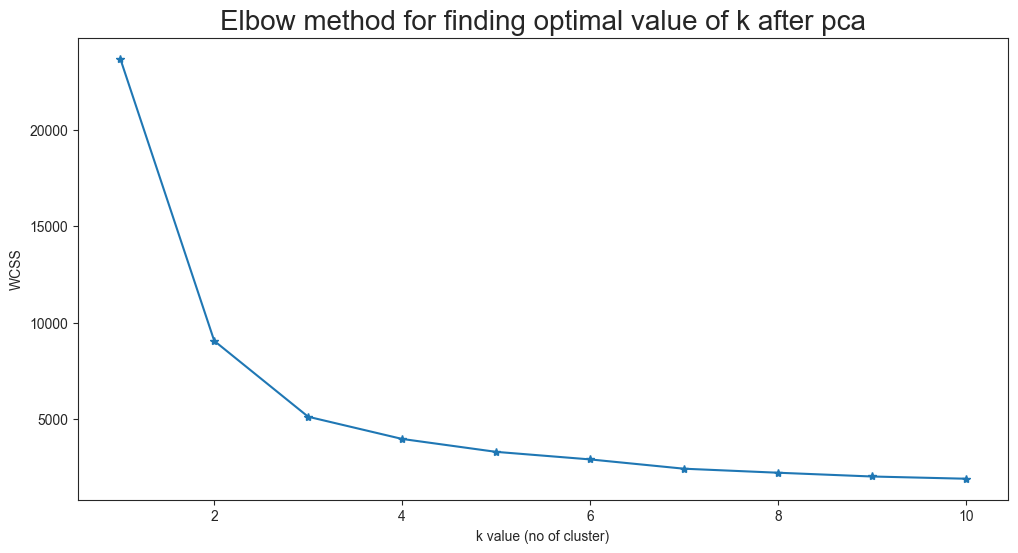

In [49]:
#We apply elbow method for predicting the no of cluster for K-Means

wcss={}
for i in range (1,11):
    km=KMeans(n_clusters=i)
    km.fit(pcadf)
    wcss[i]=km.inertia_

plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss.values(),marker='*')
plt.title("Elbow method for finding optimal value of k after pca",fontsize=20)
plt.xlabel('k value (no of cluster)')
plt.ylabel("WCSS")
plt.show()

In [50]:
#here no of cluster is nearly 3 because after that cluster the graph looks constant
#we will use k=3 in KMeans Algorithm


for i in range (3,7):
    kmeans=KMeans(n_clusters=i)
    pred=kmeans.fit_predict(pcadf)
    print("Silhouette score for ",i,"cluster is :",silhouette_score(pcadf,pred))


Silhouette score for  3 cluster is : 0.5104310386093386
Silhouette score for  4 cluster is : 0.45367076649131005
Silhouette score for  5 cluster is : 0.4491568781942954
Silhouette score for  6 cluster is : 0.3953804694268214


In [51]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


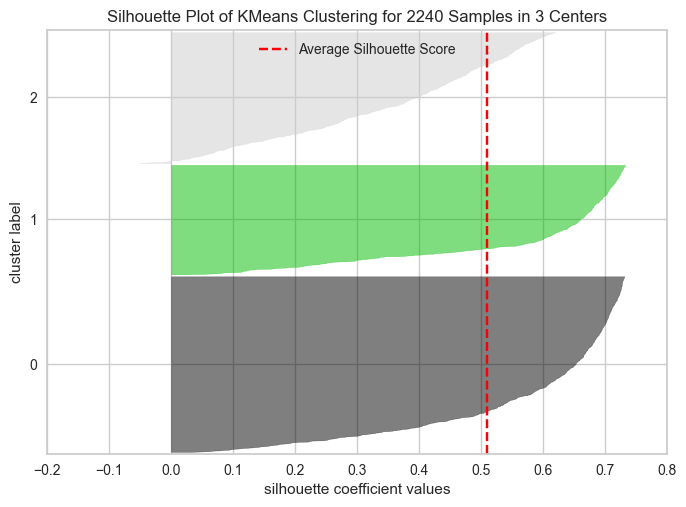

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 2240 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [52]:
#for 3 cluster we got a good silhoutee score so we use k=3

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='nipy_spectral')

visualizer.fit(pcadf)        # Fit the data to the model
visualizer.show()            # Show the silhouette plot


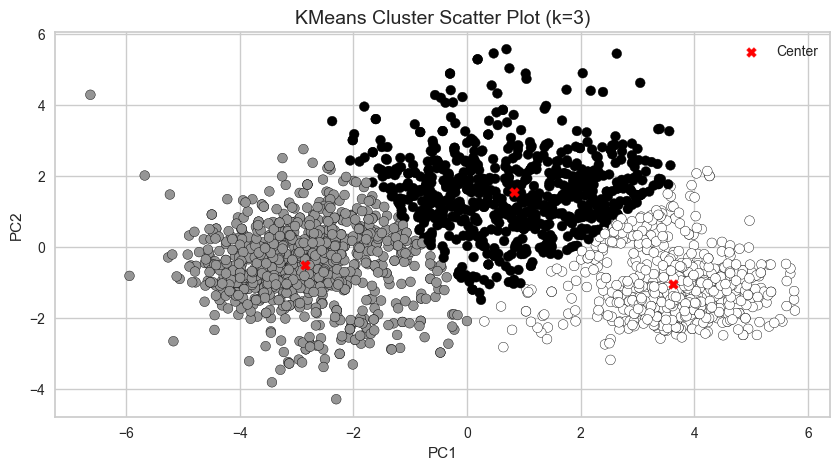

In [53]:
#scatter plot for this 
kmeans=KMeans(n_clusters=3,random_state=1)
pred=kmeans.fit_predict(pcadf)
plt.figure(figsize=(10,5))
plt.scatter(pcadf.iloc[:,0],pcadf.iloc[:,1],c=pred,edgecolors='black')

center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='red',marker='X',label='Center')


plt.title("KMeans Cluster Scatter Plot (k=3)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
#Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
for i in range (3,8):
    aggl=AgglomerativeClustering(n_clusters=i,metric='euclidean')
    pred=aggl.fit_predict(pcadf)
    print("Silhouette score for ",i,"cluster is :",silhouette_score(pcadf,pred))


Silhouette score for  3 cluster is : 0.4731768573600944
Silhouette score for  4 cluster is : 0.4390931411148488
Silhouette score for  5 cluster is : 0.4165380963272712
Silhouette score for  6 cluster is : 0.39363338261228803
Silhouette score for  7 cluster is : 0.3896976933086591


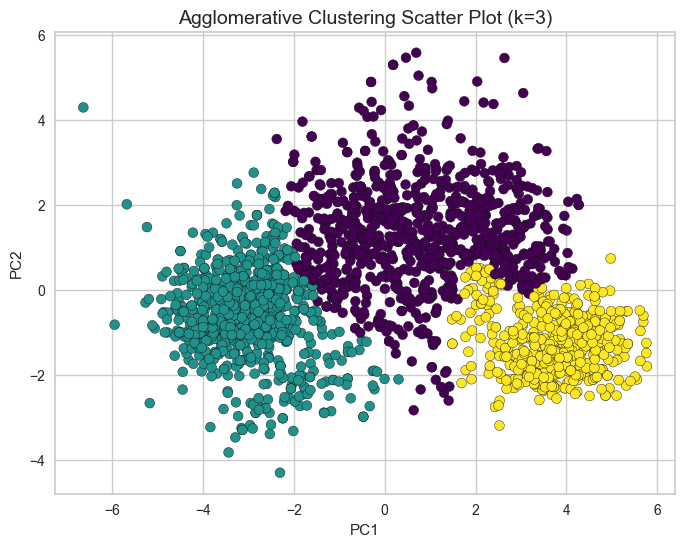

In [55]:
#here the silhouthee score for 3 cluster is max so we select the no of cluster is 3


#scatter plot for this 
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(pcadf)

# Plot scatter
plt.figure(figsize=(8, 6))
plt.scatter(pcadf.iloc[:, 0], pcadf.iloc[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

plt.title("Agglomerative Clustering Scatter Plot (k=3)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [56]:
#Gaussian Mixture model

from sklearn.mixture import GaussianMixture
for i in range (3,8):
    gauss=GaussianMixture(n_components=i)
    pred=gauss.fit_predict(pcadf)
    print("Silhouette score for ",i,"cluster is :",silhouette_score(pcadf,pred))


Silhouette score for  3 cluster is : 0.4768345676863226
Silhouette score for  4 cluster is : 0.40141187860450334
Silhouette score for  5 cluster is : 0.4384682772492296
Silhouette score for  6 cluster is : 0.4090724783750543
Silhouette score for  7 cluster is : 0.36816365177962423


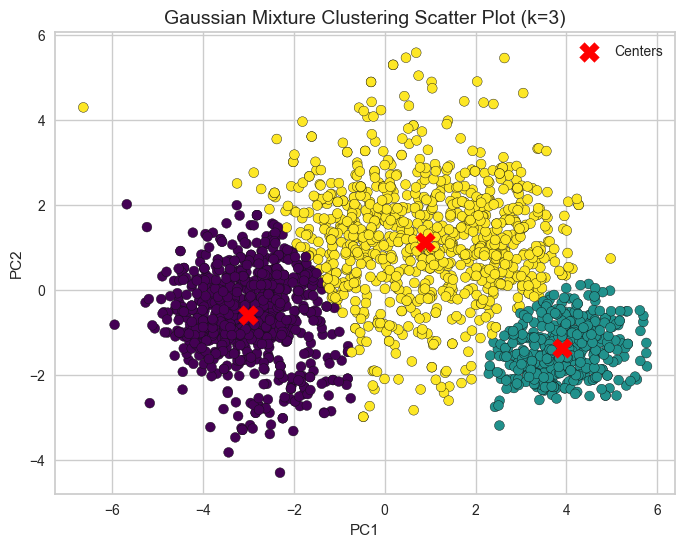

In [57]:
#here the silhouthee score for 3 cluster is max so we select the no of cluster is 3

#Scatter plot
gmm = GaussianMixture(n_components=3, random_state=42)
labels = gmm.fit_predict(pcadf)

# Plot scatter
plt.figure(figsize=(8, 6))
plt.scatter(pcadf.iloc[:, 0], pcadf.iloc[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k')

# Optional: plot centers
centers = gmm.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centers')

plt.title("Gaussian Mixture Clustering Scatter Plot (k=3)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

-0.23426240928027298


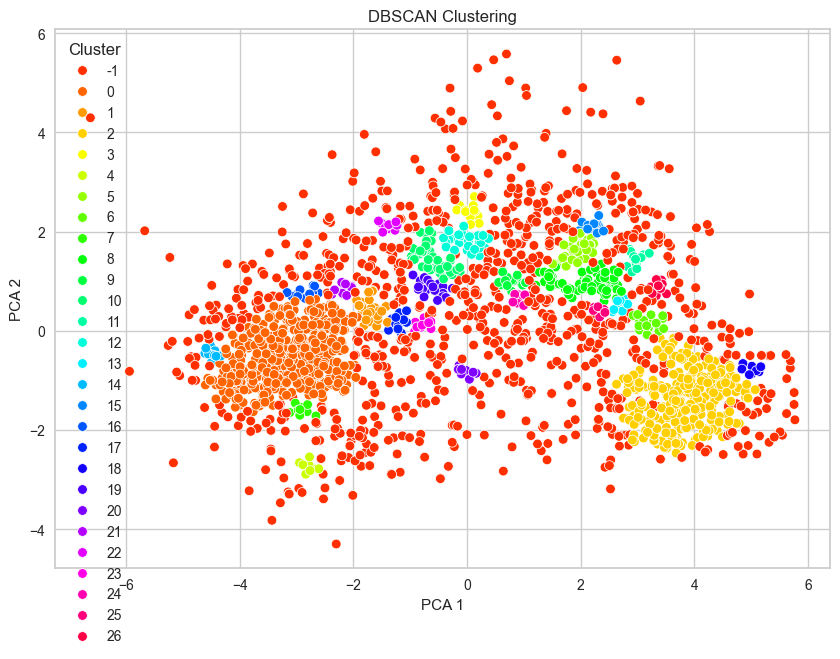

-0.4147713519839685


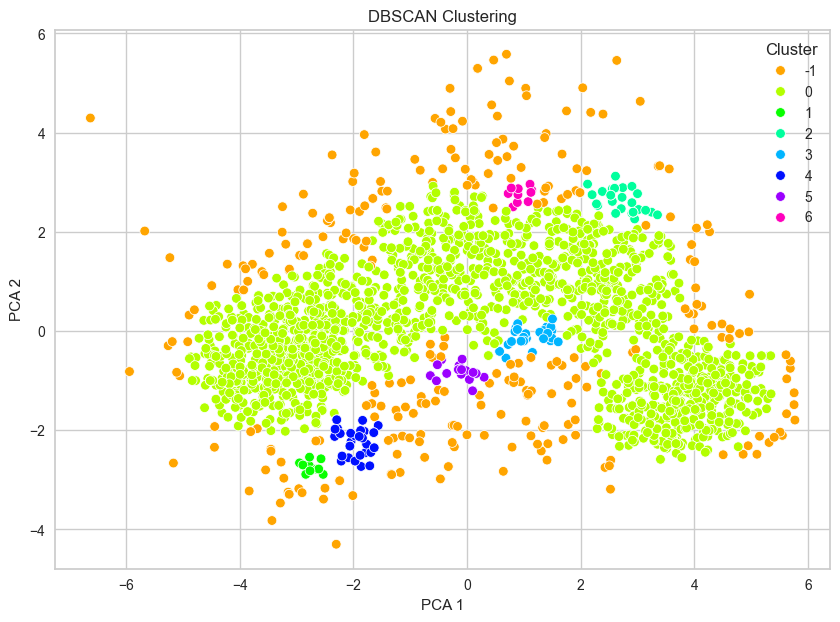

0.15974122103545396


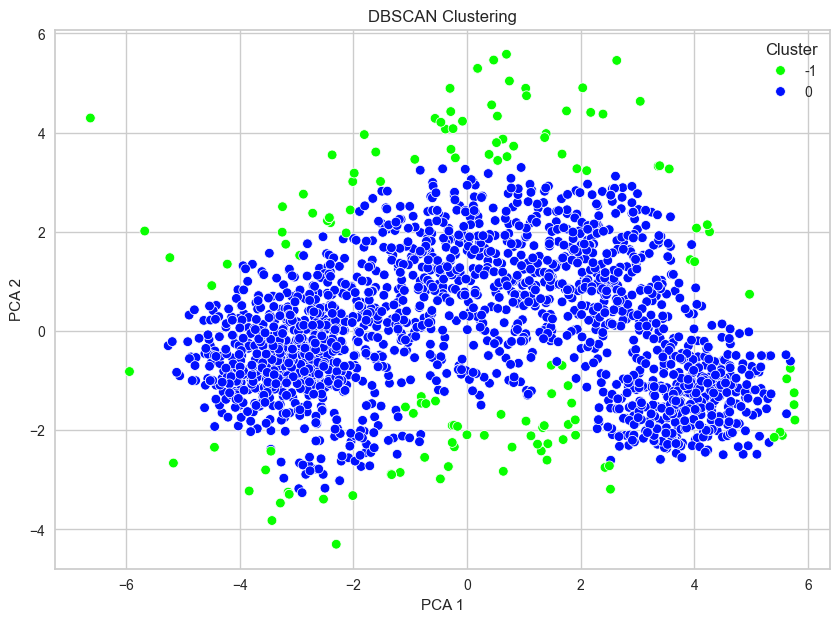

-0.06006399270972389


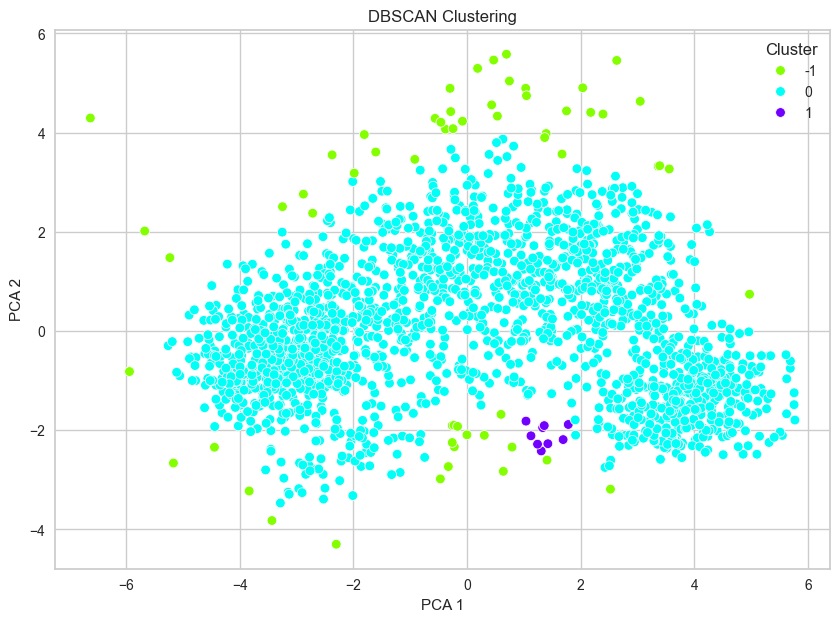

0.2744652495696389


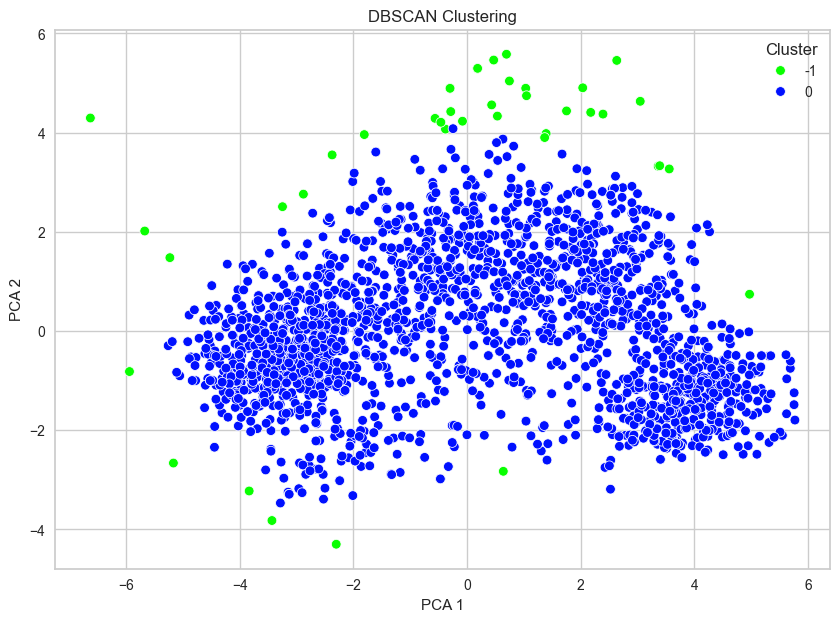

0.3172844741542238


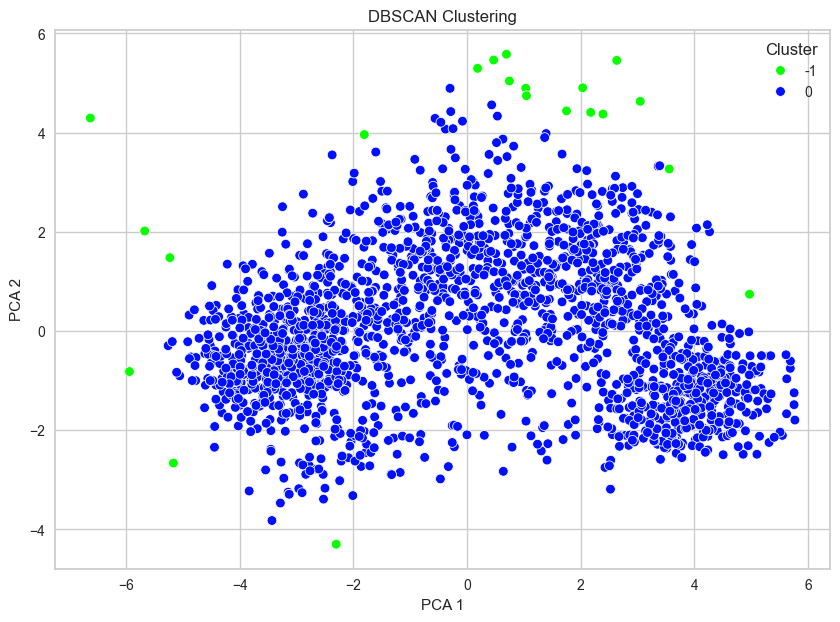

0.33908356767836806


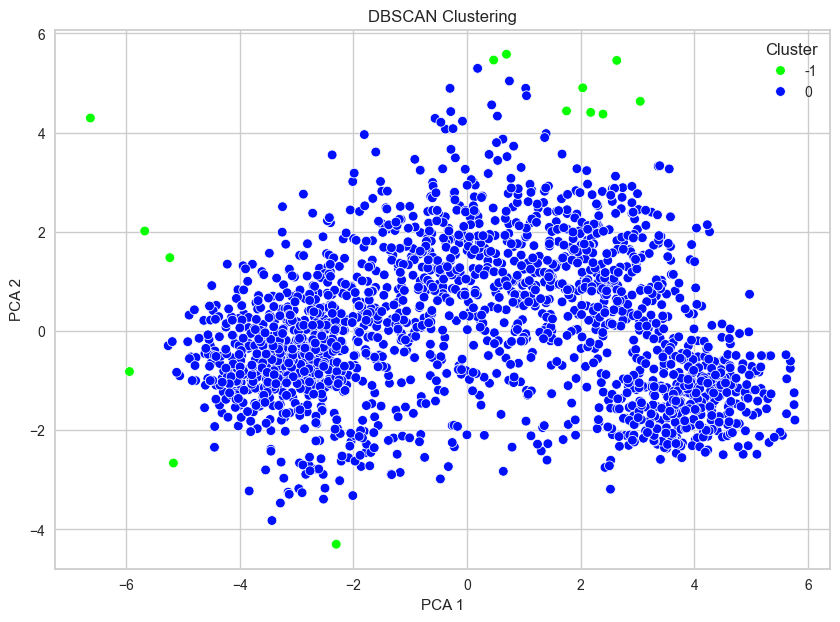

In [58]:
#DBSCAN Clustering


from sklearn.cluster import DBSCAN


for eps in [0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    model=DBSCAN(eps=eps,min_samples=10).fit(pcadf)
    model_label=model.labels_

    print(silhouette_score(pcadf,model_label))
    plt.figure(figsize=(10, 7))
    plt.title('DBSCAN Clustering')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    sns.scatterplot(
    x=pcadf.iloc[:, 0],
    y=pcadf.iloc[:, 1],
    hue=model_label,
    palette=sns.color_palette("hsv", len(set(model_label))),
    legend='full'
    )
    plt.legend(title="Cluster")
    plt.show()        
    
        

In [59]:
#0.33908356767836806 best silhothee socre for this dbscan model


DBSCAN does't perform well in clustering


Final model --> KMeans with k=3

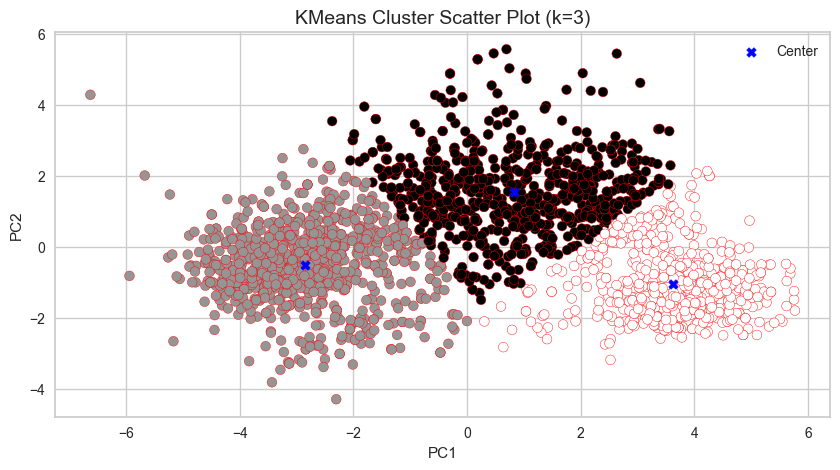

In [60]:
#scatter plot for this 
kmeans=KMeans(n_clusters=3,random_state=1)
pred=kmeans.fit_predict(pcadf)
plt.figure(figsize=(10,5))
plt.scatter(pcadf.iloc[:,0],pcadf.iloc[:,1],c=pred,edgecolors='red')

center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='blue',marker='X',label='Center')


plt.title("KMeans Cluster Scatter Plot (k=3)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

Saving the model

In [61]:
import pickle
import os
os.makedirs("./jupiter/data/", exist_ok=True)

In [62]:
with open("./jupiter/data/model.pkl","wb") as f:
    pickle.dump(model,f)

In [63]:
df

,Education,Marital Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Discount Purchases,Web,Catalog,Store,NumWebVisitsMonth,Age,Children,total_spend,total_promo,Parental_status,Days_as_Customer
0,2,0,58138.0,58,635,81,546,120.5,81,88.0,3,8,10,4,7,68,0,1617.0,0,0,4684.0
1,2,0,46344.0,38,11,1,6,2.0,1,6.0,2,1,1,2,5,71,2,27.0,0,1,4134.0
2,2,1,71613.0,26,426,49,127,111.0,21,42.0,1,8,2,10,4,60,0,776.0,0,0,4333.0
3,2,1,26646.0,26,11,4,20,10.0,3,5.0,2,2,0,4,6,41,1,53.0,0,1,4160.0
4,4,1,58293.0,94,173,43,118,46.0,27,15.0,5,5,3,6,5,44,1,422.0,0,1,4182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,61223.0,46,709,43,182,42.0,81,126.5,2,9,3,4,5,58,1,1341.0,0,1,4402.0
2236,4,1,64014.0,56,406,0,30,0.0,0,8.0,7,8,2,5,7,79,3,444.0,1,1,4040.0
2237,2,0,56981.0,91,908,48,217,32.0,12,24.0,1,2,3,13,6,44,0,1241.0,1,0,4176.0
2238,3,1,69245.0,8,428,30,214,80.0,30,61.0,2,6,5,10,3,69,1,843.0,0,1,4177.0


we make cluster column in the df and now the cluster column is our target column in the df


In [66]:
df["cluster"]=kmeans.labels_.astype(int)

df.to_csv("./Data/clustered_data.csv",index=False)